In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from matplotlib.patches import ConnectionPatch

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

colors = sns.color_palette('deep')

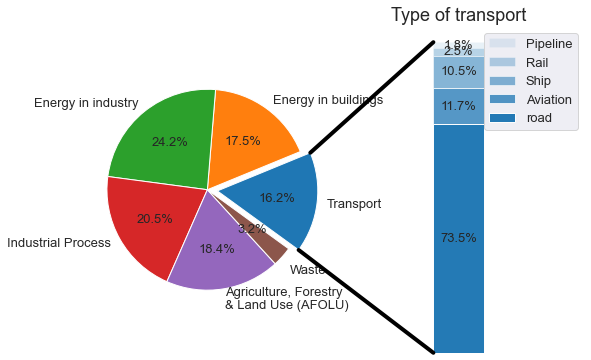

In [120]:
# pie chart parameters
overall_ratios = [16.2,
                  17.5,
                  24.2,
                  20.5,
                  18.4,
                  3.2]
labels = ["Transport",
          "Energy in buildings",
          "Energy in industry",
          "Industrial Process",
          "Agriculture, Forestry\n& Land Use (AFOLU)",
          "\nWaste"]
          
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))
fig.subplots_adjust(wspace=0)

explode = [0.1, 0, 0, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [0.7350,
              0.1170,
              0.1050,
              0.0250,
              0.0180]

age_labels = ["road",
              "Aviation",
              "Ship",
              "Rail",
              "Pipeline"]
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.22 * j)
    ax2.bar_label(bc, labels=[f"{height:.1%}"], label_type='center')

ax2.set_title('Type of transport')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

here we see the breakdown of energy usage by sector represented by a pie chart. The transport sector is our point of interest with a bar that represents the types of vehicles. We notice that the transport sector has an impactful size with road vehicles dominating by a large ammount

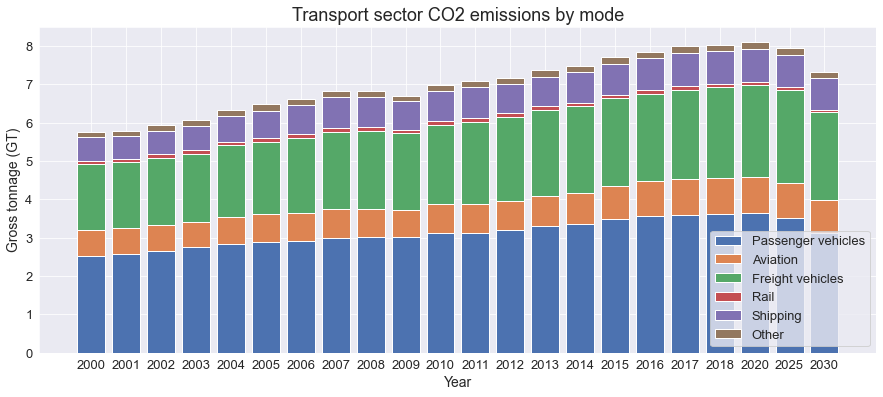

In [121]:
data = pd.read_csv('data/transport-sector-co2-emissions-by-mode-in-the-sustainable-development-scenario-2000-2030.csv')
plt.figure(figsize=(15,6), tight_layout=False)

year = data.iloc[:,0]
passenger_vehicles = data.iloc[:,1]
aviation = data.iloc[:,2]
freight_vehicles = data.iloc[:,3]
rail = data.iloc[:,4]
shipping = data.iloc[:,5]
other = data.iloc[:,6]
index = np.arange(len(data))

graph1 = plt.bar(x=index, height=passenger_vehicles, color=colors[0], label='Passenger vehicles')
graph2 = plt.bar(x=index, height=aviation, color=colors[1], bottom=passenger_vehicles, label='Aviation')
graph3 = plt.bar(x=index, height=freight_vehicles, color=colors[2], bottom=passenger_vehicles+aviation, label='Freight vehicles')
graph4 = plt.bar(x=index, height=rail, color=colors[3], bottom=passenger_vehicles+aviation+freight_vehicles, label='Rail')
graph5 = plt.bar(x=index, height=shipping, color=colors[4], bottom=passenger_vehicles+aviation+freight_vehicles+rail, label='Shipping')
graph6 = plt.bar(x=index, height=other, color=colors[5], bottom=passenger_vehicles+aviation+freight_vehicles+rail+shipping, label='Other')

plt.xlabel('Year')
plt.ylabel('Gross tonnage (GT)')
plt.title('Transport sector CO2 emissions by mode')
plt.xticks(index, year)
plt.legend()
plt.show()


Now when we look at the CO2 emmissions from transportation over the past 20 years, we can notice a gradual increase year by year. However, in a sustainable development scenario, we can could potentially reduce the ammount CO2 emmissions from transportations as the graph indicates.

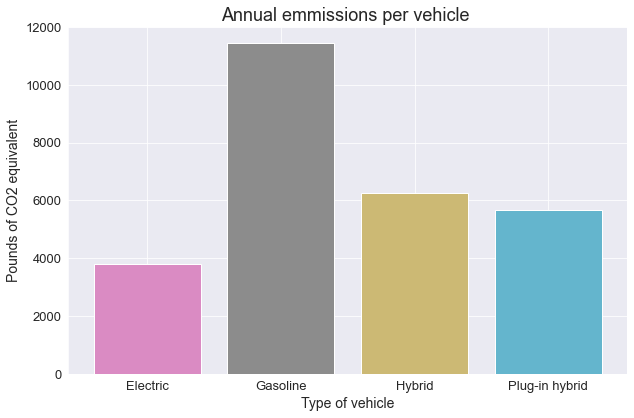

In [122]:
data = pd.read_csv('data/methods of transportation.csv')
plt.figure(figsize=(9,6), tight_layout=True)

type_of_vehicles = ['Electric', 'Plug-in hybrid', 'Hybrid', 'Gasoline']
methods_of_trans = data[data['Type of vehicle'].isin(type_of_vehicles)]

barplot = methods_of_trans.groupby(['Type of vehicle'], as_index=False).mean()[['Type of vehicle', 'Pounds of CO2 equivalent']]

plt.bar(barplot['Type of vehicle'], barplot['Pounds of CO2 equivalent'], color=colors[-4:])

plt.xlabel('Type of vehicle')
plt.ylabel('Pounds of CO2 equivalent')
plt.title('Annual emmissions per vehicle ')

plt.show()

Considering how we have a variety of different types of cars in this day and age, it is imprtant to take into account that they produce varying ammounts of CO2. It is no surprise that gasoline cars emit less CO2 than hybrid and electric cars. However, the relative difference can be well illustrated in this graph

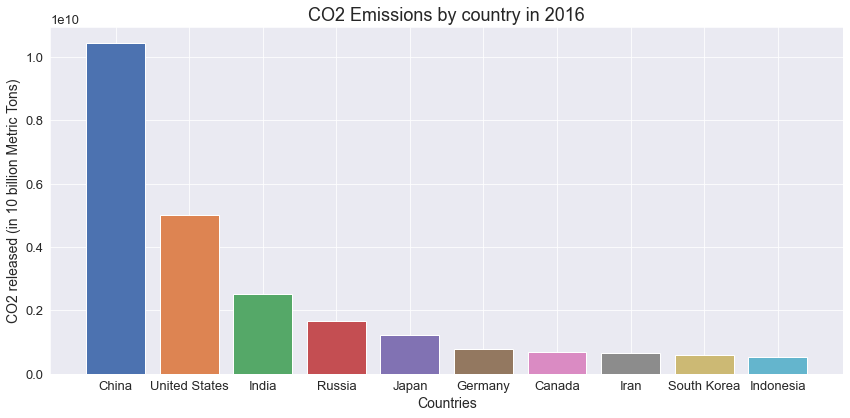

In [123]:
with open('data/CO2ByCountry.csv', newline = '') as csvf:
    reader = csv.reader(csvf)
    next(reader)
    x = []
    y = []
    for row in reader:
        x.append(row[0])
        y.append(int(''.join(row[1].split(','))))

plt.figure(figsize=(12,6), tight_layout = True)
plt.title("CO2 Emissions by country in 2016")
plt.xlabel("Countries")
plt.ylabel("CO2 released (in 10 billion Metric Tons)")

for i in range(len(x)):
    plt.bar(x[i], y[i], color=colors[i])


plt.show()

Thinking broadly, we organise the top 10 countries based on carbon emissions

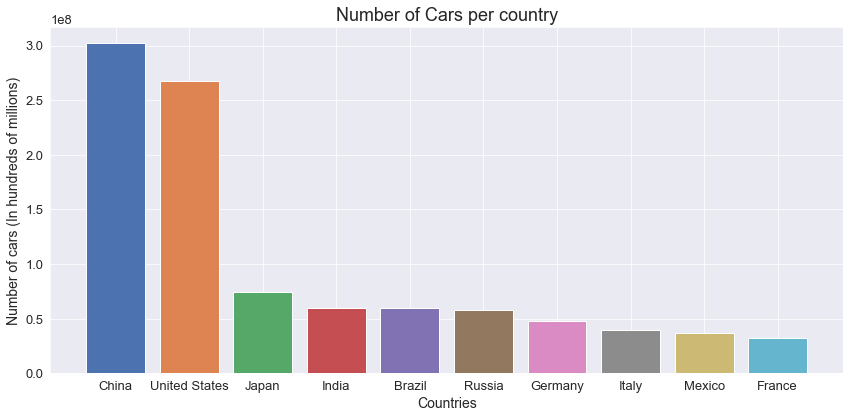

In [124]:
with open('data/NumberOfCars.csv', newline = '') as csvf:
    reader = csv.reader(csvf)
    x = []
    y = []
    for row in reader:
        x.append(row[0])
        y.append(int(''.join(row[2].split(','))))

plt.figure(figsize=(12,6), tight_layout = True)
plt.title("Number of Cars per country")
plt.xlabel("Countries")
plt.ylabel("Number of cars (In hundreds of millions)")

for i in range(len(x)):
    plt.bar(x[i], y[i], color=colors[i])

plt.show()

This graph represents the top 10 countries based on the number of cars they have. Comparing this to the previous graph. We find tha there is a correlation between the numbers of cars in a country and the total CO2 emissions in that country.

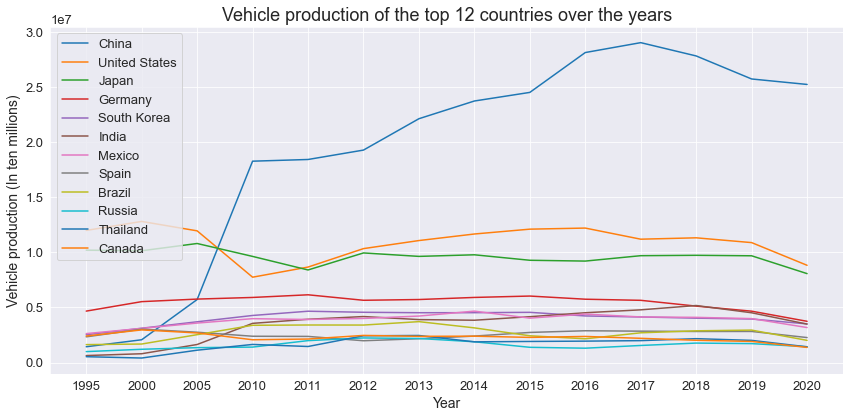

In [125]:
with open ("data/multiple_line.csv", newline = '') as csvf:
    reader = csv.reader(csvf)
    rows = list(reader)
    years = rows[0][1:]
    years.reverse()
    country = []
    data_full = []
    data = []
    for row in rows[1:]:
        country.append(row[0])
        for number in row[1:]:
            data.append(int(''.join(number.split(','))))
        data.reverse()
        data_full.append(data)
        data = []
        
plt.figure(figsize=(12,6), tight_layout = True)
cursor = 0
for i in country:
    plt.plot(years, data_full[cursor], label = i, linestyle="-")

    cursor += 1

plt.title("Vehicle production of the top 12 countries over the years")
plt.xlabel("Year")
plt.ylabel("Vehicle production (In ten millions)")

plt.legend()
plt.show()

Looking at the coutries that produce the most vehicles, we notice that many countries that appeared in the previous two graphs also appear here. Again, this is a correlation which not necessarily does not indicate causation